# Analizando el modelo Sugarscape.
**A continuación se presenta un análisis de los datos arrojados por algunos experimentos realizados con el modelo de Sugarscape. Veremos la relación de la variable de dotación inicial (maximum-sugar-endowment y minimum-sugar-endowment) y las métricas del índice GINI, la cantidad de decesos por hambre (starvation), la riqueza per cápita y la cantidad promedio de cambios de azúcar tras aplicar las políticas de recaudación y redistribución. Los mapas de calor de cada experimentación pueden ser consultados a detalle en el otro notebook adjuntado.**
## Importando bibliotecas

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from pathlib import Path
sns.set()

# Métodos auxiliares

In [2]:
def limpiar_dataframe(df):
    limpiado = df.drop(columns='visualization')
    limpiado = limpiado.drop(limpiado[limpiado['[step]'] == 0].index) # aquellas runs que no se iniciaron
    limpiado = limpiado.drop(columns='[run number]')
    limpiado = limpiado.drop(columns='initial-population') #poblacion fija
    limpiado = limpiado.drop(columns='[step]') # en este punto, todas las runs son validas y llegaron a la it final
    try:
        limpiado = limpiado.drop(columns='taxation')
        limpiado = limpiado.drop(columns='redistribution')
    except:
        return limpiado
        
    return limpiado
    
def mapa_calor(df,medida,titulo,ruta):
    datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values=medida)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
    plt.text(0, -0.5, titulo, fontsize=12, color='black', ha='left')
    plt.savefig(ruta,dpi=300, bbox_inches='tight')
    plt.show()
    

# Mapas de calor sobre el índice GINI, decesos por hambruna y riqueza per cápita

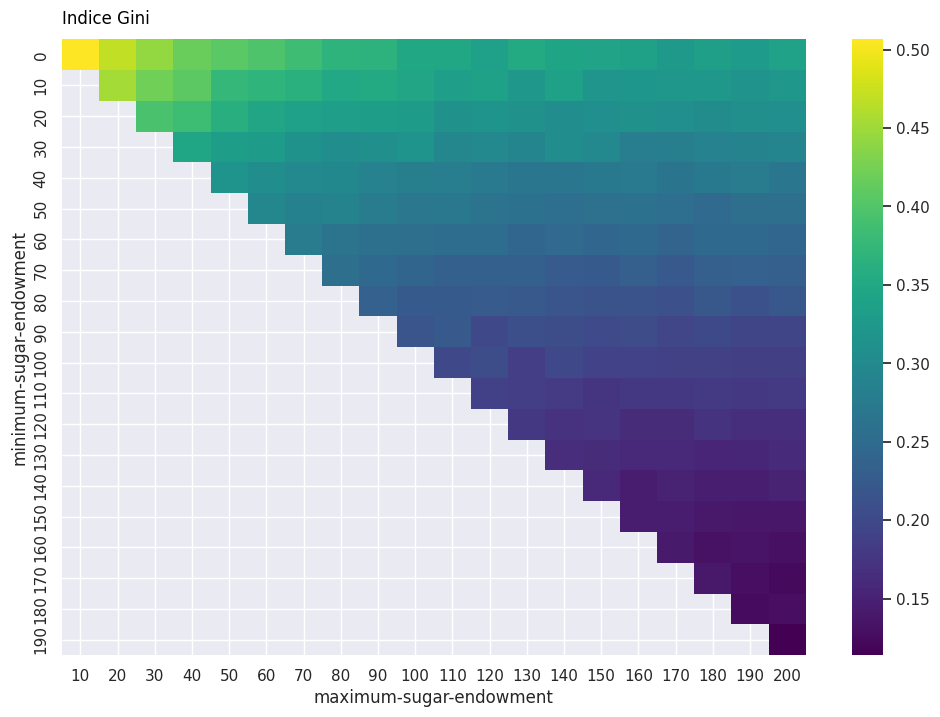

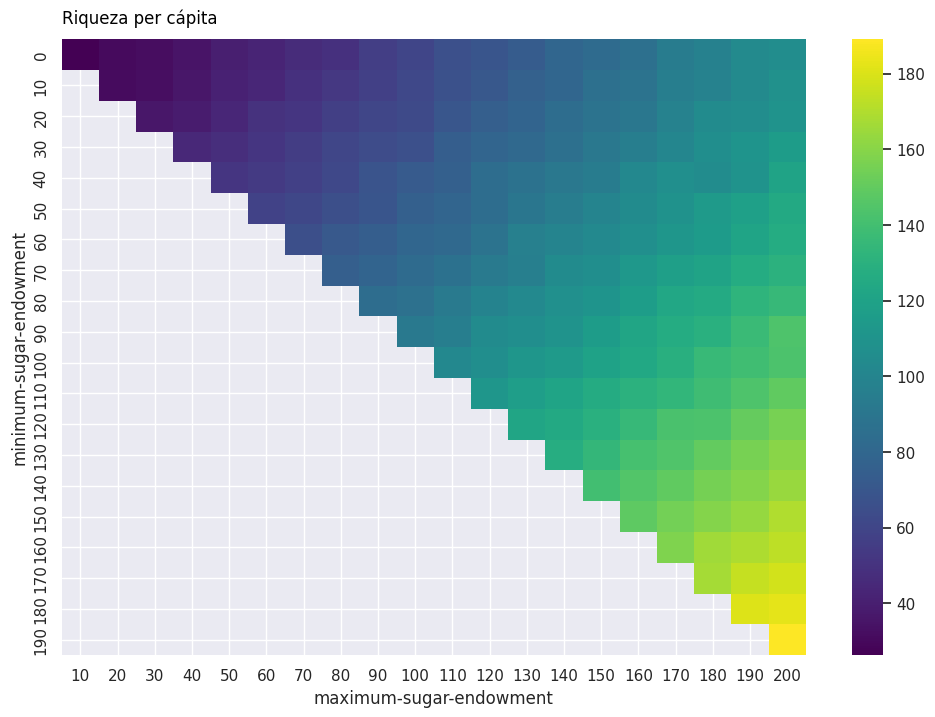

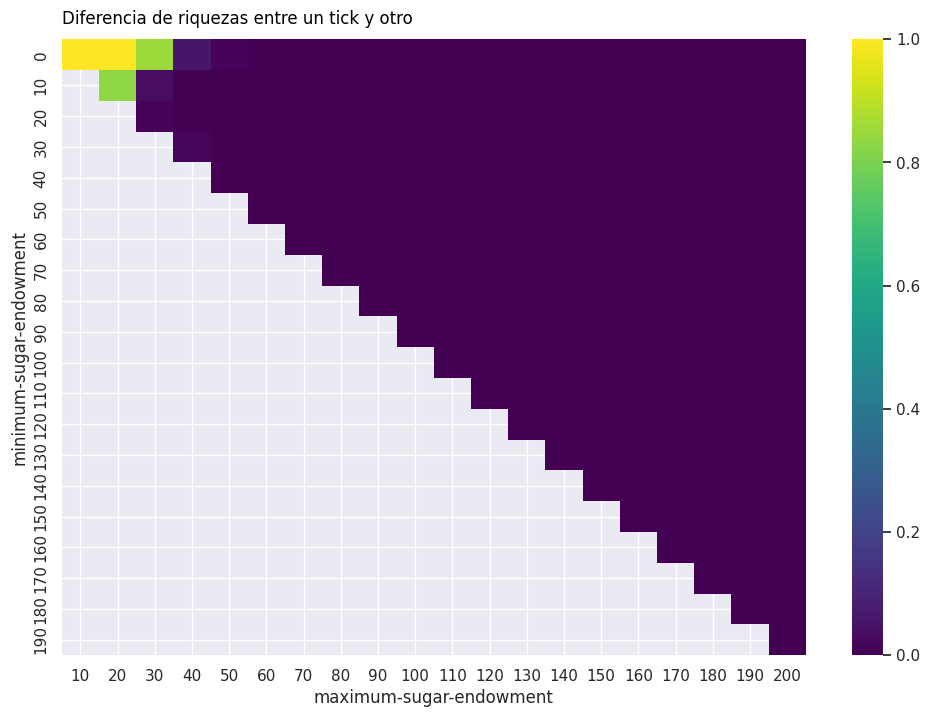

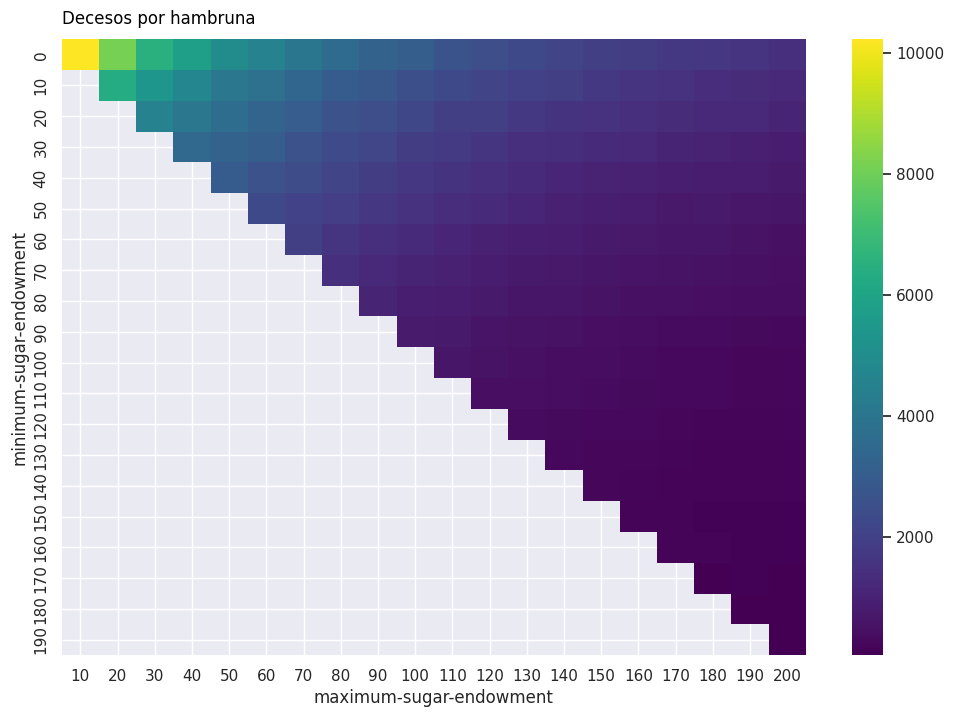

In [8]:
# análisis separado para el modelo sin politicas
tipos_analisis = {'Indice Gini':'avg-gini',
                  'Riqueza per cápita':'avg-productivity',
                  'Diferencia de riquezas entre un tick y otro':'avg-diff',
                  'Decesos por hambruna' : 'starvation'
                 }
datos_base = pd.read_csv('datasets/simple.csv')
datos_base = limpiar_dataframe(datos_base)

for llave in tipos_analisis.keys():
    mapa_calor(datos_base, tipos_analisis[llave], llave, 'figuras/'+llave)



In [29]:
# Las caracteristicas a analizar
datos_analisis = {'Indice Gini': [],
                  'Riqueza per cápita': [],
                  'Diferencia de riquezas entre un tick y otro':[],
                  'Decesos por hambruna' : []
                 }
nombres_politicas = []

# patron util para recuperar el tipo de politica de recaudacion y redistribucion
carpeta_datasets = Path('datasets/')
patron = r"(\w+)-(\w+)\.csv$"

for archivo in carpeta_datasets.glob("*.csv"):
    # dataset correspondiende a la implementacion de una politica de recaudacion combinada con una de redistribucion
    df = pd.read_csv(archivo)
    df = limpiar_dataframe(df)
    match = re.match(patron, archivo.name)
    print(archivo.name)
    if match:
        # nombre de la politica de recaudacion y redistribucion
        recaudacion = match.group(1)
        redist = match.group(2)
        nombre = recaudacion +' '+ redist
        nombres_politicas.append(nombre)
        # dataframes para cada analisis(gini, riqueza, decesos, diferencias) de cada dataset
        for llave in tipos_analisis.keys():
            medida = tipos_analisis[llave]
            datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values=medida)
            datos_analisis[llave].append(datos_aplanados)
            


lineal-dirigida.csv
dinamica-uniforme.csv
lineal-dinamica.csv
uniforme-lineal.csv
lineal-uniforme.csv
dinamica-dinamica.csv
lineal-lineal.csv
simple.csv
dinamica-lineal.csv
uniforme-uniforme.csv
uniforme-dinamica.csv


# ¿Cuál es la combinación de políticas que reduce más el índice Gini?

In [30]:
resultados_politicas = datos_analisis['Indice Gini']
gini = 1
politica = ''
for i in range(len(resultados_politicas)):
    politica_actual = resultados_politicas[i]
    valor_actual = politica_actual[20][10]
    if valor_actual < gini:
        gini = valor_actual
        politica = nombres_politicas[i]
print(f'La mejor politica es {politica} con un indice Gini de {gini}')

La mejor politica es uniforme lineal con un indice Gini de 0.0229435132093009


# ¿Cuál es la combinación de políticas que reduce más los decesos por hambruna?

In [31]:
resultados_politicas = datos_analisis['Decesos por hambruna']
decesos = 50000
politica = ''
for i in range(len(resultados_politicas)):
    politica_actual = resultados_politicas[i]
    valor_actual = politica_actual[20][10]
    if valor_actual < decesos:
        decesos = valor_actual
        politica = nombres_politicas[i]
print(f'La mejor politica es {politica} con un numero de decesos de {decesos}')

La mejor politica es dinamica uniforme con un numero de decesos de 0.0


# ¿Cuál es la combinación de políticas que maximiza la riqueza per cápita?

In [32]:
resultados_politicas = datos_analisis['Riqueza per cápita']
riqueza = 0
politica = ''
for i in range (len(resultados_politicas)):
    politica_actual = resultados_politicas[i]
    valor_actual = politica_actual[20][10]
    if valor_actual > riqueza:
        riqueza = valor_actual
        politica = nombres_politicas[i]
print(f'La mejor politica es {politica} con una riqueza per cápita de {riqueza}')

La mejor politica es dinamica lineal con una riqueza per cápita de 31.040325


# ¿Cuál es la combinación de políticas que ofrece más estabilidad en las diferencias de la riqueza?

In [34]:
resultados_politicas = datos_analisis['Diferencia de riquezas entre un tick y otro']
diferencia = 100
politica = ''
for i in range (len(resultados_politicas)):
    politica_actual = resultados_politicas[i]
    valor_actual = abs(politica_actual[20][10])
    if valor_actual < diferencia:
        diferencia = valor_actual
        politica = nombres_politicas[i]
print(f'La mejor politica es {politica} con una diferencia de {diferencia}')

La mejor politica es uniforme lineal con una diferencia de 0.015
